In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2ae04404-4276-4241-8968-2b02b4a3a69b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-09T16:54:24.699Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 10275}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11825, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11825,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979071e+07,1.979071e+07,False,NaN,1,NaN,NaN,None,2024-12-09T16:53:00.000Z,98003.258010,7.901211e+10,82.8960,0.471871,-1.908852,1.808877,28.654832,62.397944,72.226712,1.939554e+12,54.3907,2.058068e+12,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00
1,1027,Ethereum,ETH,ethereum,9648,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204452e+08,1.204452e+08,True,NaN,2,NaN,NaN,None,2024-12-09T16:53:00.000Z,3857.309602,3.525242e+10,67.0380,1.310829,-3.327946,6.421379,27.141494,61.126912,64.838505,4.645944e+11,13.0308,4.645944e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00
2,825,Tether USDt,USDT,tether,107418,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.380648e+11,1.411936e+11,True,NaN,3,NaN,NaN,None,2024-12-09T16:53:00.000Z,0.999746,1.858215e+11,43.0110,-0.003575,-0.075227,-0.071914,-0.067686,0.074799,-0.057986,1.380297e+11,3.8702,1.411578e+11,None,2024-12-09T16:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-09 16:54:30.502913+00:00
3,52,XRP,XRP,xrp,1470,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.711723e+10,9.998690e+10,False,NaN,4,NaN,NaN,None,2024-12-09T16:53:00.000Z,2.405488,1.401480e+10,28.7460,0.934264,-5.912384,-11.279694,338.305934,347.635326,348.269573,1.373948e+11,3.8529,2.405488e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00
4,5426,Solana,SOL,solana,804,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.761143e+08,5.898424e+08,True,NaN,5,NaN,NaN,None,2024-12-09T16:53:00.000Z,225.265518,4.882013e+09,31.1358,0.864182,-4.575804,-0.394539,14.282030,63.119790,67.362414,1.072521e+11,3.0077,1.328711e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00
5,1839,BNB,BNB,bnb,2302,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440089e+08,1.440089e+08,False,NaN,6,NaN,NaN,None,2024-12-09T16:53:00.000Z,723.003951,2.498009e+09,13.0496,1.289507,-2.310200,12.728671,16.500336,28.276322,40.274103,1.041190e+11,2.9198,1.041190e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00
6,74,Dogecoin,DOGE,dogecoin,1121,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.471304e+11,1.471304e+11,True,NaN,7,NaN,NaN,None,2024-12-09T16:53:00.000Z,0.438025,8.120413e+09,-14.8105,1.457387,-5.832448,3.154587,113.611535,317.421290,327.013247,6.444683e+10,1.8073,6.444683e+10,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00
7,3408,USDC,USDC,usd-coin,23661,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.080165e+10,4.080165e+10,False,NaN,8,NaN,NaN,None,2024-12-09T16:53:00.000Z,1.000012,1.131942e+10,72.4907,0.004466,-0.002219,-0.002306,0.010996,0.005854,0.010682,4.080215e+10,1.1440,4.080215e+10,None,2024-12-09T16:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-09 16:54:30.502913+00:00
8,2010,Cardano,ADA,cardano,1386,2017-10-01T00:00:00.000Z,"[dpos, pos

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\joyba\Downloads\Data Analyst\Python\Amazon Web Scraper Project\Automating Crypto Website API project\API.csv'):
        #df.to_csv(r'C:\Users\joyba\Downloads\Data Analyst\Python\Amazon Web Scraper Project\Automating Crypto Website API project\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\joyba\Downloads\Data Analyst\Python\Amazon Web Scraper Project\Automating Crypto Website API project\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 min 
exit()

c:\users\joyba\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\joyba\AppData\Local\Temp\ipykernel_13060\3559792713.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


c:\users\joyba\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\joyba\AppData\Local\Temp\ipykernel_13060\3559792713.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


c:\users\joyba\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\joyba\AppData\Local\Temp\ipykernel_13060\3559792713.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


c:\users\joyba\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\joyba\AppData\Local\Temp\ipykernel_13060\3559792713.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


c:\users\joyba\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\joyba\AppData\Local\Temp\ipykernel_13060\3559792713.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


c:\users\joyba\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\joyba\AppData\Local\Temp\ipykernel_13060\3559792713.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


c:\users\joyba\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\joyba\AppData\Local\Temp\ipykernel_13060\3559792713.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [10]:
#df72 = pd.read_csv(r'C:\Users\joyba\Downloads\Data Analyst\Python\Amazon Web Scraper Project\Automating Crypto Website API project\API.csv')
#df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11825,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.979057e+07,1.979057e+07,False,NaN,1,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,99001.336354,6.672102e+10,56.6095,0.788453,-1.337443,3.407162,29.544178,62.704202,74.570162,1.959293e+12,54.4311,2.079028e+12,NaN,2024-12-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 14:06:04.053686
1,1,1027,Ethereum,ETH,ethereum,9648,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204452e+08,1.204452e+08,True,NaN,2,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,3894.199350,2.932615e+10,38.1653,1.100072,-2.529949,6.985382,27.883922,63.626992,67.175985,4.690376e+11,13.0244,4.690376e+11,NaN,2024-12-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 14:06:04.053686
2,2,52,XRP,XRP,xrp,1470,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.711723e+10,9.998690e+10,False,NaN,3,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,2.424807,1.328901e+10,7.9823,1.492095,-5.210371,0.065703,341.793956,353.647832,351.984726,1.384983e+11,3.8476,2.424807e+11,NaN,2024-12-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 14:06:04.053686
3,3,825,Tether USDt,USDT,tether,107404,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.380648e+11,1.411936e+11,True,NaN,4,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,1.000183,1.654450e+11,26.5662,0.057568,-0.069663,0.009081,-0.023328,0.114218,0.009394,1.380901e+11,3.8374,1.412195e+11,NaN,2024-12-09T14:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-09 14:06:04.053686
4,4,5426,Solana,SOL,solana,803,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.761161e+08,5.898435e+08,True,NaN,5,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,228.964899,4.030461e+09,-1.7335,0.815087,-3.451227,1.250103,14.755010,65.761593,70.879947,1.090139e+11,3.0285,1.350535e+11,NaN,2024-12-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 14:06:04.053686
5,5,1839,BNB,BNB,bnb,2301,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440089e+08,1.440089e+08,False,NaN,6,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,728.411295,2.418695e+09,6.2071,0.627345,-1.916313,13.885947,16.785046,28.910475,40.797786,1.048977e+11,2.9142,1.048977e+11,NaN,2024-12-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 14:06:04.053686
6,6,74,Dogecoin,DOGE,dogecoin,1121,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.471288e+11,1.471288e+11,True,NaN,7,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,0.439608,7.711662e+09,-21.1018,1.466350,-5.317002,4.635795,112.984643,315.543141,329.903711,6.467907e+10,1.7979,6.467907e+10,NaN,2024-12-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 14:06:04.053686
7,7,3408,USDC,USDC,usd-coin,23660,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.088086e+10,4.088086e+10,False,NaN,8,NaN,NaN,NaN,2024-12-09T14:05:00.000Z,1.000262,9.674852e+09,45.4268,0.029852,0.006411,0.021665,0.034826,0.033053,0.018727,4.089156e+10,1.1363,4.089156e+10,NaN,2024-12-09T14:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-09 14:06:04.053686
8,8,2010,Cardano,ADA,cardano,1386,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.50

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11825,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979071e+07,1.979071e+07,False,NaN,1,NaN,NaN,None,2024-12-09T16:53:00.000Z,98003.258010,7.901211e+10,82.8960,0.471871,-1.908852,1.808877,28.654832,62.397944,72.226712,1.939554e+12,54.3907,2.058068e+12,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
1,1027,Ethereum,ETH,ethereum,9648,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204452e+08,1.204452e+08,True,NaN,2,NaN,NaN,None,2024-12-09T16:53:00.000Z,3857.309602,3.525242e+10,67.0380,1.310829,-3.327946,6.421379,27.141494,61.126912,64.838505,4.645944e+11,13.0308,4.645944e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
2,825,Tether USDt,USDT,tether,107418,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.380648e+11,1.411936e+11,True,NaN,3,NaN,NaN,None,2024-12-09T16:53:00.000Z,0.999746,1.858215e+11,43.0110,-0.003575,-0.075227,-0.071914,-0.067686,0.074799,-0.057986,1.380297e+11,3.8702,1.411578e+11,None,2024-12-09T16:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-09 16:54:30.502913+00:00,NaT
3,52,XRP,XRP,xrp,1470,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.711723e+10,9.998690e+10,False,NaN,4,NaN,NaN,None,2024-12-09T16:53:00.000Z,2.405488,1.401480e+10,28.7460,0.934264,-5.912384,-11.279694,338.305934,347.635326,348.269573,1.373948e+11,3.8529,2.405488e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
4,5426,Solana,SOL,solana,804,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.761143e+08,5.898424e+08,True,NaN,5,NaN,NaN,None,2024-12-09T16:53:00.000Z,225.265518,4.882013e+09,31.1358,0.864182,-4.575804,-0.394539,14.282030,63.119790,67.362414,1.072521e+11,3.0077,1.328711e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
5,1839,BNB,BNB,bnb,2302,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440089e+08,1.440089e+08,False,NaN,6,NaN,NaN,None,2024-12-09T16:53:00.000Z,723.003951,2.498009e+09,13.0496,1.289507,-2.310200,12.728671,16.500336,28.276322,40.274103,1.041190e+11,2.9198,1.041190e+11,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
6,74,Dogecoin,DOGE,dogecoin,1121,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.471304e+11,1.471304e+11,True,NaN,7,NaN,NaN,None,2024-12-09T16:53:00.000Z,0.438025,8.120413e+09,-14.8105,1.457387,-5.832448,3.154587,113.611535,317.421290,327.013247,6.444683e+10,1.8073,6.444683e+10,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
7,3408,USDC,USDC,usd-coin,23661,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.080165e+10,4.080165e+10,False,NaN,8,NaN,NaN,None,2024-12-09T16:53:00.000Z,1.000012,1.131942e+10,72.4907,0.004466,-0.002219,-0.002306,0.010996,0.005854,0.010682,4.080215e+10,1.1440,4.080215e+10,None,2024-12-09T16:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-09 16:54:30.502913+00:00,NaT
8,2010,Cardano,ADA,cardano

In [8]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11825,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19790712.00000,19790712.00000,False,NaN,1,NaN,NaN,None,2024-12-09T16:53:00.000Z,98003.25801,79012112905.57274,82.89600,0.47187,-1.90885,1.80888,28.65483,62.39794,72.22671,1939554254344.36816,54.39070,2058068418217.17993,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
1,1027,Ethereum,ETH,ethereum,9648,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120445200.66390,120445200.66390,True,NaN,2,NaN,NaN,None,2024-12-09T16:53:00.000Z,3857.30960,35252418833.81844,67.03800,1.31083,-3.32795,6.42138,27.14149,61.12691,64.83851,464594428978.58179,13.03080,464594428978.58002,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
2,825,Tether USDt,USDT,tether,107418,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,138064756646.84210,141193635672.13589,True,NaN,3,NaN,NaN,None,2024-12-09T16:53:00.000Z,0.99975,185821512551.73001,43.01100,-0.00357,-0.07523,-0.07191,-0.06769,0.07480,-0.05799,138029739045.40222,3.87020,141157824487.73001,None,2024-12-09T16:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-09 16:54:30.502913+00:00,NaT
3,52,XRP,XRP,xrp,1470,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57117231849.00000,99986904872.00000,False,NaN,4,NaN,NaN,None,2024-12-09T16:53:00.000Z,2.40549,14014798248.84426,28.74600,0.93426,-5.91238,-11.27969,338.30593,347.63533,348.26957,137394795593.40273,3.85290,240548764612.10999,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
4,5426,Solana,SOL,solana,804,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,476114263.39323,589842379.28239,True,NaN,5,NaN,NaN,None,2024-12-09T16:53:00.000Z,225.26552,4882013223.91842,31.13580,0.86418,-4.57580,-0.39454,14.28203,63.11979,67.36241,107252126267.03241,3.00770,132871149227.03999,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
5,1839,BNB,BNB,bnb,2302,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144008897.49000,144008897.49000,False,NaN,6,NaN,NaN,None,2024-12-09T16:53:00.000Z,723.00395,2498009108.36855,13.04960,1.28951,-2.31020,12.72867,16.50034,28.27632,40.27410,104119001813.81900,2.91980,104119001813.82001,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
6,74,Dogecoin,DOGE,dogecoin,1121,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147130446383.70520,147130446383.70520,True,NaN,7,NaN,NaN,None,2024-12-09T16:53:00.000Z,0.43803,8120412727.19100,-14.81050,1.45739,-5.83245,3.15459,113.61154,317.42129,327.01325,64446828868.16116,1.80730,64446828868.16000,None,2024-12-09T16:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-09 16:54:30.502913+00:00,NaT
7,3408,USDC,USDC,usd-coin,23661,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,40801649794.33807,40801649794.33807,False,NaN,8,NaN,NaN,None,2024-12-09T16:53:00.000Z,1.00001,11319424959.48002,72.49070,0.00447,-0.00222,-0.00231,0.01100,0.00585,0.01068,40802147875.20257,1.14400,40802147875.2

In [10]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.32376,-1.97695,1.72481,28.62776,62.37120,72.17799
Ethereum,1.00039,-3.34331,6.23821,27.11413,60.95308,64.72815
Tether USDt,0.01018,-0.06618,-0.06635,-0.05832,0.08868,-0.02375
XRP,1.00772,-5.91157,-11.30532,338.47439,347.91401,348.39947
Solana,0.75396,-4.60146,-0.49093,14.32766,63.13880,67.27746
BNB,1.37994,-2.33329,12.60020,16.56633,28.27707,40.19299
Dogecoin,1.36219,-5.79425,2.95776,113.34672,317.51009,326.86752
USDC,0.01173,0.00648,0.01324,0.02701,0.02027,0.01571
Cardano,1.34294,-4.90108,-6.77685,156.62621,233.94479,229.30397


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.32376
             quote.USD.percent_change_24h    -1.97695
             quote.USD.percent_change_7d      1.72481
             quote.USD.percent_change_30d    28.62776
             quote.USD.percent_change_60d    62.37120
             quote.USD.percent_change_90d    72.17799
Ethereum     quote.USD.percent_change_1h      1.00039
             quote.USD.percent_change_24h    -3.34331
             quote.USD.percent_change_7d      6.23821
             quote.USD.percent_change_30d    27.11413
             quote.USD.percent_change_60d    60.95308
             quote.USD.percent_change_90d    64.72815
Tether USDt  quote.USD.percent_change_1h      0.01018
             quote.USD.percent_change_24h    -0.06618
             quote.USD.percent_change_7d     -0.06635
             quote.USD.percent_change_30d    -0.05832
             quote.USD.percent_change_60d     0.08868
             quote.USD.percent_change_90

In [12]:
type(df3)

pandas.core.frame.DataFrame

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.32376
            quote.USD.percent_change_24h  -1.97695
            quote.USD.percent_change_7d    1.72481
            quote.USD.percent_change_30d  28.62776
            quote.USD.percent_change_60d  62.37120
            quote.USD.percent_change_90d  72.17799
Ethereum    quote.USD.percent_change_1h    1.00039
            quote.USD.percent_change_24h  -3.34331
            quote.USD.percent_change_7d    6.23821
            quote.USD.percent_change_30d  27.11413
            quote.USD.percent_change_60d  60.95308
            quote.USD.percent_change_90d  64.72815
Tether USDt quote.USD.percent_change_1h    0.01018
            quote.USD.percent_change_24h  -0.06618
            quote.USD.percent_change_7d   -0.06635
            quote.USD.percent_change_30d  -0.05832
            quote.USD.percent_change_60d   0.08868
            quote.USD.percent_change_90d  -0.02375
XRP         quote.USD.percent_change_1h    1.00772
            quote.USD.percent_change_24h  -5.91157
            quote.USD.percent_change_7d  -11.30532
            quote.USD.percent_change_30d 338.47439
            quote.USD.percent_change_60d 347.91401
            quote.USD.percent_change_90d 348.39947
Solana      quote.USD.percent_change_1h    0.75396
            quote.USD.percent_change_24h  -4.60146
            quote.USD.percent_change_7d   -0.49093
            quote.USD.percent_change_30d  14.32766
            quote.USD.percent_change_60d  63.13880
            quote.USD.percent_change_90d  67.27746
BNB         quote.USD.percent_change_1h    1.37994
            quote.USD.percent_change_24h  -2.33329
            quote.USD.percent_change_7d   12.60020
            quote.USD.percent_change_30d  16.56633
            quote.USD.percent_change_60d  28.27707
            quote.USD.percent_change_90d  40.19299
Dogecoin    quote.USD.percent_change_1h    1.36219
            quote.USD.percent_change_24h  -5.79425
            quote.USD.percent_change_7d    2.95776
            quote.USD.percent_change_30d 113.34672
            quote.USD.percent_change_60d 317.51009
            quote.USD.percent_change_90d 326.86752
USDC        quote.USD.percent_change_1h    0.01173
            quote.USD.percent_change_24h   0.00648
            quote.USD.percent_change_7d    0.01324
            quote.USD.percent_change_30d   0.02701
            quote.USD.percent_change_60d   0.02027
            quote.USD.percent_change_90d   0.01571
Cardano     quote.USD.percent_change_1h    1.34294
            quote.USD.percent_change_24h  -4.90108
            quote.USD.percent_change_7d   -6.77685
            quote.USD.percent_change_30d 156.62621
            quote.USD.percent_change_60d 233.94479
            quote.USD.percent_change_90d 229.30397
TRON        quote.USD.percent_change_1h    1.55759
            quote.USD.percent_change_24h  -6.52680
            quote.USD.percent_change_7d   38.59641
            quote.USD.percent_change_30d  84.18367
            quote.USD.percent_change_60d  85.35545
            quote.USD.percent_change_90d  94.10317
Avalanche   quote.USD.percent_change_1h    1.05068
            quote.USD.percent_change_24h  -5.05215
            quote.USD.percent_change_7d    2.23611
            quote.USD.percent_change_30d  71.44819
            quote.USD.percent_change_60d  92.87436
            quote.USD.percent_change_90d 106.55816
Shiba Inu   quote.USD.percent_change_1h    1.42414
            quote.USD.percent_change_24h  -6.50688
            quote.USD.percent_change_7d    3.56723
            quote.USD.percent_change_30d  57.92556
            quote.USD.percent_change_60d  82.49107
            quote.USD.percent_change_90d 124.87054
Toncoin     quote.USD.percent_change_1h    1.23020
            quote.USD.percent_change_24h  -3.80891
            quote.USD.percent_change_7d   -0.68470
            quote.USD.percent_change_30d  23.26506
            quote.USD.percent_change_60d  27.97883
            quo

In [15]:
type(df5)

pandas.core.frame.DataFrame

In [16]:
df5.count()

values    90
dtype: int64

In [17]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.32376
1,Bitcoin,quote.USD.percent_change_24h,-1.97695
2,Bitcoin,quote.USD.percent_change_7d,1.72481
3,Bitcoin,quote.USD.percent_change_30d,28.62776
4,Bitcoin,quote.USD.percent_change_60d,62.37120
5,Bitcoin,quote.USD.percent_change_90d,72.17799
6,Ethereum,quote.USD.percent_change_1h,1.00039
7,Ethereum,quote.USD.percent_change_24h,-3.34331
8,Ethereum,quote.USD.percent_change_7d,6.23821
9,Ethereum,quote.USD.percent_change_30d,27.11413


In [20]:
df7 = df6.rename(columns ={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.32376
1,Bitcoin,quote.USD.percent_change_24h,-1.97695
2,Bitcoin,quote.USD.percent_change_7d,1.72481
3,Bitcoin,quote.USD.percent_change_30d,28.62776
4,Bitcoin,quote.USD.percent_change_60d,62.37120
5,Bitcoin,quote.USD.percent_change_90d,72.17799
6,Ethereum,quote.USD.percent_change_1h,1.00039
7,Ethereum,quote.USD.percent_change_24h,-3.34331
8,Ethereum,quote.USD.percent_change_7d,6.23821
9,Ethereum,quote.USD.percent_change_30d,27.11413


In [21]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.32376
1,Bitcoin,24h,-1.97695
2,Bitcoin,7d,1.72481
3,Bitcoin,30d,28.62776
4,Bitcoin,60d,62.37120
5,Bitcoin,90d,72.17799
6,Ethereum,1h,1.00039
7,Ethereum,24h,-3.34331
8,Ethereum,7d,6.23821
9,Ethereum,30d,27.11413


In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
     -------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.2 MB/s eta 0:00:00
     -------------------------------------- 477.9/477.9 kB 6.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: c:\users\joyba\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

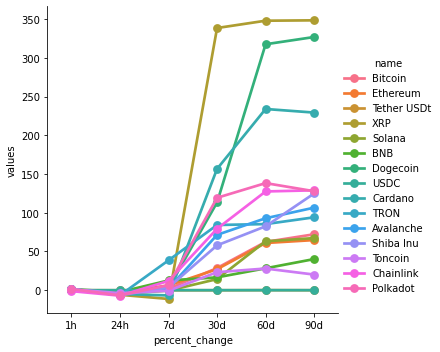

In [23]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [24]:
df10 = df[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,98003.25801,2024-12-09 16:54:30.502913+00:00
1,Ethereum,3857.30960,2024-12-09 16:54:30.502913+00:00
2,Tether USDt,0.99975,2024-12-09 16:54:30.502913+00:00
3,XRP,2.40549,2024-12-09 16:54:30.502913+00:00
4,Solana,225.26552,2024-12-09 16:54:30.502913+00:00
5,BNB,723.00395,2024-12-09 16:54:30.502913+00:00
6,Dogecoin,0.43803,2024-12-09 16:54:30.502913+00:00
7,USDC,1.00001,2024-12-09 16:54:30.502913+00:00
8,Cardano,1.12786,2024-12-09 16:54:30.502913+00:00
9,TRON,0.29545,2024-12-09 16:54:30.502913+00:00


In [32]:
df11 = df[['name','quote.USD.price','timestamp']]
df11 = df11.query("name == 'XRP'")
df11

,name,quote.USD.price,timestamp
3,XRP,2.40549,2024-12-09 16:54:30.502913+00:00
3,XRP,2.40549,NaT
3,XRP,2.41075,NaT
3,XRP,2.41039,NaT
3,XRP,2.40916,NaT
3,XRP,2.40295,NaT
3,XRP,2.40285,NaT
3,XRP,2.40192,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

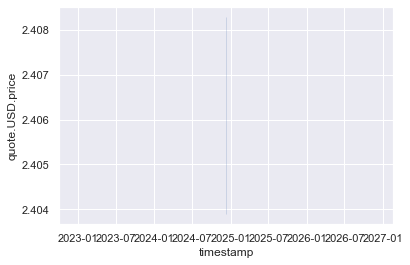

In [33]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)
